This is an analysis of wine prices and qualities produced in differnet countries. 
Dataset obtained from Kaggle (https://www.kaggle.com/zynicide/wine-reviews)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [86]:
wine_review = pd.read_csv('/home/tahere/python/Wine_data/winemag-data-130k-v2.csv')
wine_review.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Taste description based on country of origin
Which words/terms are used to describe the wine taste and texture of each country? The answer to this question might become handy to be able to predict which the country of origing of each wine according to the its description.

In [98]:
# This is a function to split words in a string statement, cleans words off of punctuation marks,
# and gives out the count of each word.
from collections import Counter

def clean_up(desc):
    split_desc = desc.split()
    useless_words = ['feels','white','blend','now','nose','offers','red','A','a','by','Drink','mouth','It\'s','are','notes','but','It','palate','wine','finish','aromas','to','flavors','in','on','this','This','The','the','much','as','has','is', 'and', 'already', 'it','will', 'be', 'while', 'from', 'although', 'that','with', 'a', 'of','its','for']
    clean_desc = []
    for word in split_desc:
        if word[-1] in ",.":
            word = word[:-1]
        if word not in useless_words:
            clean_desc.append(word) # for every country you'll have this   
    frequency_desc = Counter(clean_desc).most_common(5)
    return frequency_desc
    
# Now we can find the top 5 most used words in the reviews to describe the wines of each country.
desc_by_country = wine_review.groupby('country')['description'].apply(lambda x: ' '.join(x))
pd.DataFrame(desc_by_country.apply(clean_up))


,description
country,
Argentina,"[(berry, 1650), (plum, 1178), (blackberry, 944..."
Armenia,"[(pineapple, 2), (grapefruit, 2), (bright, 2),..."
Australia,"[(fruit, 1039), (vanilla, 428), (Shiraz, 426),..."
Austria,"[(fruit, 1411), (fresh, 996), (acidity, 965), ..."
Bosnia and Herzegovina,"[(black, 3), (Toasted, 1), (oak, 1), (cedar, 1..."
Brazil,"[(plum, 17), (cherry, 14), (berry, 12), (fruit..."
Bulgaria,"[(cherry, 134), (black, 108), (tannins, 47), (..."
Canada,"[(fruit, 121), (citrus, 41), (acidity, 40), (f..."
Chile,"[(berry, 1755), (herbal, 1439), (plum, 1428), ..."


The above table would give an overview of which words are used to describe the profile of the wine produced in each country. 
One drawback is that this data is not normalized for the number of datapoints per each country. Additionally, for bigger countries which tend to have a variety of differnet climates, a region-specific analysis would make more sense. However, I still think it is an interesting qualititative overview. It gives you a rough idea of the overall characterisitics of the wine produced in each of these countries.

# Price vs. Quality

A look at the price of wine vs. the points it's been given in the reviews. To get an overall look on the matter, a scatterplot has been plotted. As a simple summary, the points were divided into four intervals, and the mean price of each interval has been depicted in a bar chart. 

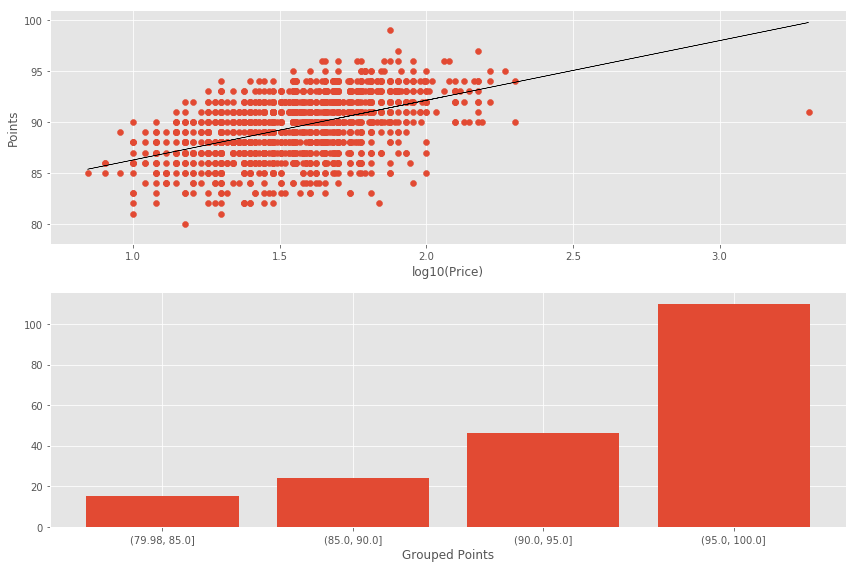

In [102]:
# To get a randam sample size of 10000 from the data:
wine_sample = wine_review.sample(n=10000, random_state=1, axis=0)
wine_sample_clean = wine_sample.dropna()

ax1_x = np.log10(wine_sample_clean['price'])
ax1_y = wine_sample_clean['points']
fit_line = np.polyfit(ax1_x, ax1_y, 1)
fit_line_plot = np.poly1d(fit_line)

df = wine_review.groupby(pd.cut(wine_review['points'], bins=4))['price'].describe()

ys = df['50%']
xs = df.index.astype(str)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
ax1.scatter(ax1_x, ax1_y)
ax1.plot(ax1_x,fit_line_plot(ax1_x), color='k', linewidth=0.5)
ax1.set_xlabel('log10(Price)')
ax1.set_ylabel('Points')
ax1.set_ylim([78,101])
ax2.bar(xs, ys, capsize = 5)
ax2.set_xlabel('Grouped Points')

plt.tight_layout()
plt.show()

The overall trend shows that the higher the price, the more expensive the wine is, which is not surprising. There are a considerable number of wines above the regression line within the affordable price range of 10 to 30 dollars.
This can also be appreciated from the bar chart, where for instance half of the wines within the 90-95 points are less than around 40 dollars.

# Comparing points and prices of wine varieties from differnet countries

I selected the top five countries represented in the dataset, and compared the prices and points of 5 popular wine varieties. The wine types selected were Chardonnay, Riesling, Merlot, Pinot Noir and Sauvignon Blanc (this can be adjusted in the code depending on what variety is of interest).

In [5]:
# To select the top five countries represented in the dataset:
df = wine_review.groupby('country')['country'].count()
df.sort_values(ascending=False, inplace=True)
sorted_countries = list(df.index.astype(str))
sorted_countries[:5]

['US', 'France', 'Italy', 'Spain', 'Portugal']

In [106]:
# Selecting a subset of the dataset from the top five countries:
top5 = sorted_countries[:5]
wine_review_top5 = wine_review[wine_review.country.isin(top5)]

# The wine types being analaysed. Can be changed depeneding on what variety is of interest. 
winetype_sel = ['Chardonnay','Riesling','Merlot','Pinot Noir','Sauvignon Blanc']

# This is function which accepts a country and the attribute of interest to be analysed, and gives out the
# statistics of the attribute as a dataframe:
def country_winevar(country, attribute):
    is_country = wine_review_top5['country']==country
    wine_from_country = wine_review_top5[is_country]
    stats = wine_from_country[wine_from_country.variety.isin(winetype_sel)].groupby('variety')[attribute].describe()
    xs = stats.index.astype(str)
    return xs, stats

US_price, US_points = country_winevar('US', 'price'), country_winevar('US', 'points')
France_price, France_points = country_winevar('France', 'price'), country_winevar('France', 'points')
Italy_price, Italy_points = country_winevar('Italy', 'price'), country_winevar('Italy', 'points')
Spain_price, Spain_points = country_winevar('Spain', 'price'), country_winevar('Spain', 'points')
Portugal_price, Portugal_points = country_winevar('Portugal', 'price'), country_winevar('Portugal', 'points')

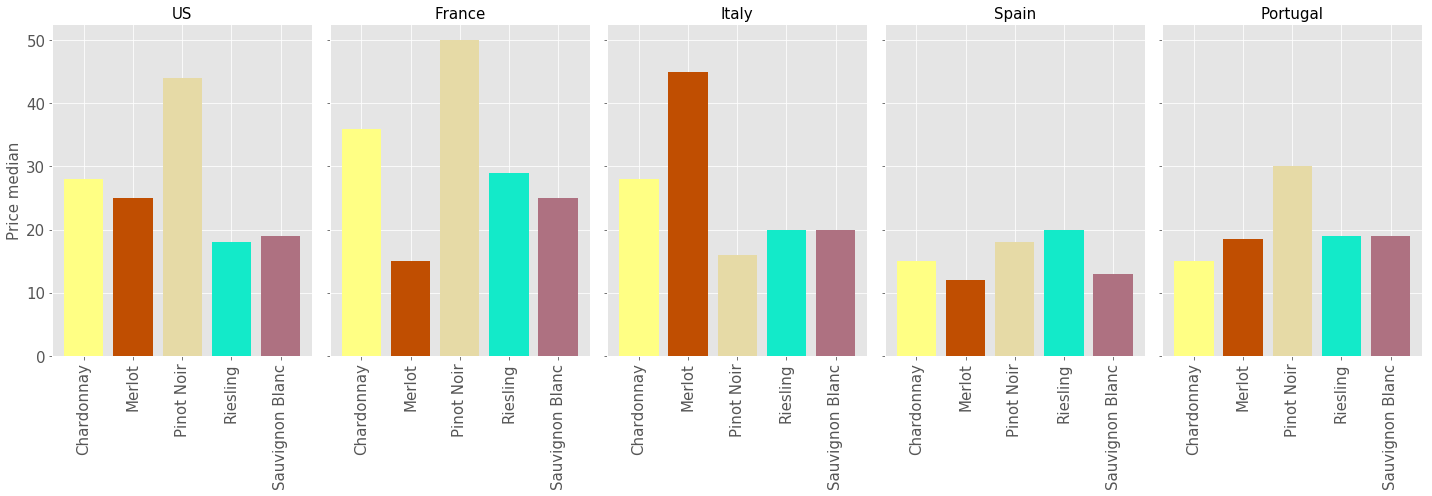

In [103]:
# To plot bar charts showing the prices of each wine variety from each of the countries:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 7), sharey=True)

colors=['xkcd:pale yellow', 'xkcd:burnt orange', 'xkcd:beige', 'xkcd:aqua', 'xkcd:mauve']
ax1.bar(US_price[0], US_price[1]['50%'], color=colors)
ax1.set_title('US', fontsize='15')
ax1.set_ylabel('Price median', fontsize='15')
ax2.bar(France_price[0], France_price[1]['50%'], color=colors)
ax2.set_title('France', fontsize='15')
ax3.bar(Italy_price[0], Italy_price[1]['50%'], color=colors)
ax3.set_title('Italy', fontsize='15')
ax4.bar(Spain_price[0], Spain_price[1]['50%'], color=colors)
ax4.set_title('Spain', fontsize='15')
ax5.bar(Portugal_price[0], Portugal_price[1]['50%'], color=colors)
ax5.set_title('Portugal', fontsize='15')

for ax in fig.axes:
    ax.tick_params(axis='x', labelsize='15', labelrotation=90)
    ax.tick_params(axis='y', labelsize='15')
plt.tight_layout()
plt.show()

Pinot Noir is the most expensive wine variety in the US, France and Portugal. While Italian Merlot seems to be the priciest wine, it is the cheapest variety produced in France. Different types of wine produced in spain seem to have a more homogenous price. 

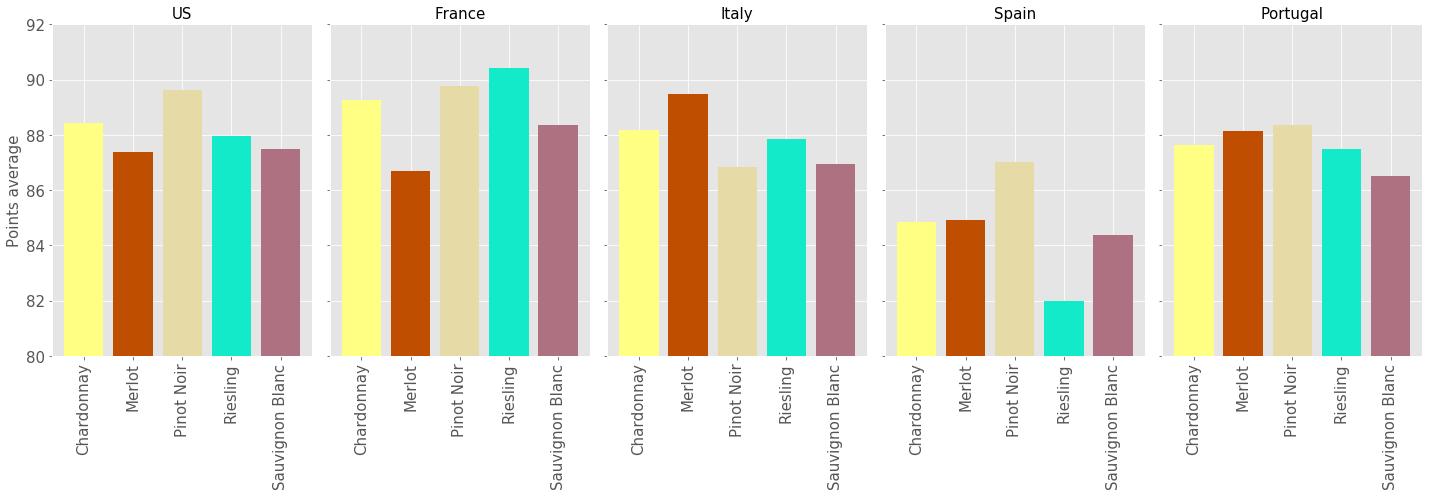

In [105]:
# To plot bar charts showing the points of each wine variety from each of the countries. 
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 7), sharey=True)

colors=['xkcd:pale yellow', 'xkcd:burnt orange', 'xkcd:beige', 'xkcd:aqua', 'xkcd:mauve']
ax1.bar(US_points[0], US_points[1]['mean'], color=colors)
ax1.set_title('US', fontsize='15')
ax1.set_ylabel('Points average', fontsize='15')
ax1.set_ylim([80, 92])
ax2.bar(France_points[0], France_points[1]['mean'], color=colors)
ax2.set_title('France', fontsize='15')
ax3.bar(Italy_points[0], Italy_points[1]['mean'], color=colors)
ax3.set_title('Italy', fontsize='15')
ax4.bar(Spain_points[0], Spain_points[1]['mean'], color=colors)
ax4.set_title('Spain', fontsize='15')
ax5.bar(Portugal_points[0], Portugal_points[1]['mean'], color=colors)
ax5.set_title('Portugal', fontsize='15')

for ax in fig.axes:
    ax.tick_params(axis='x', labelsize='15', labelrotation=90)
    ax.tick_params(axis='y', labelsize='15')
plt.tight_layout()
plt.show()

Comparing the average rating of these wine types with the prices ranges also points to an overall increase in the prices as quality increases. For instance this correlation can be observed in the case of Pinot Noir and Merlot.
Overall, it seems that Spanish wines tend to get a lower score in terms of quality, while the price is comparable to Portugese products. So at least among these wine types, if undecided between a Spanish and a Portugese product, the portugese variety might result a in more satisfactory purchase at the same price. 

# Distribution of points for each reviewer

To have an overview of the pattern of scoring for each taster, and possibly getting an idea of how strict or generous they are in their scoring, one can look at the distribution of scores given by each reviewer.
This might help in judging how trustworthy or close in opinion a particular reviewer is to you. 

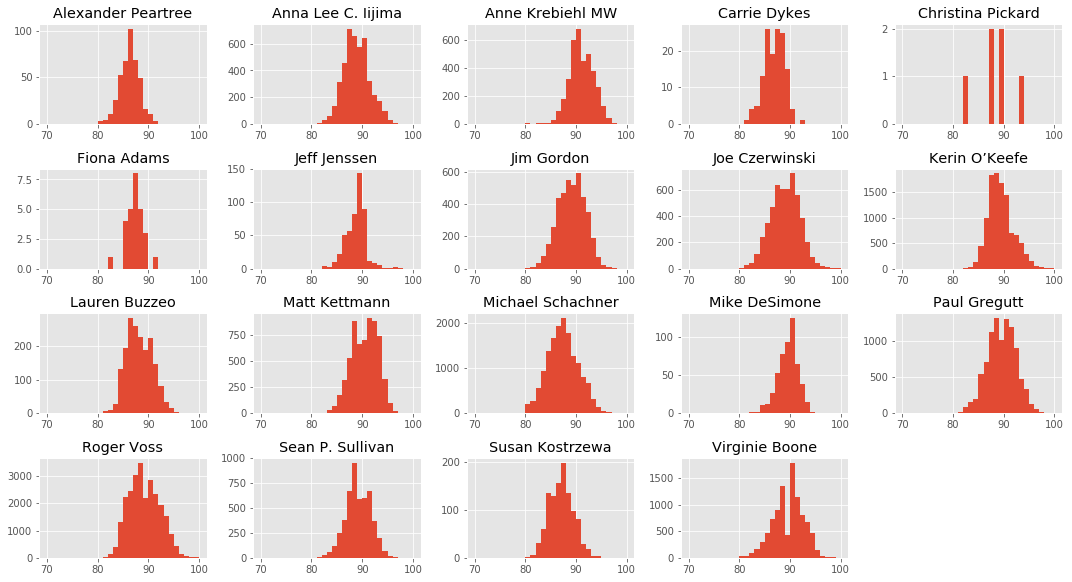

In [94]:
points_by_taster = wine_review.groupby('taster_name')['points']

fig = plt.figure(figsize=(15, 20))
for num, taster in zip(range(1,50), points_by_taster):
    ax = fig.add_subplot(10,5,num)
    ax.hist(taster[1], range=(70,100), bins=30)
    ax.set_title(taster[0])
    
plt.tight_layout()
plt.show()

# In princinple, the same code can be adjusted to get histograms and a quick overview of any two variables
# against each other in the dataset. 